<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/regression_FactSet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Source: FactSet, searching for all S&P500 company PE ratio, no theoretical justification regarding the model specification

In [36]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [37]:
import os 
os.getcwd()

'/content'

In [38]:
data = pd.read_csv('https://raw.githubusercontent.com/cyrus723/my-first-binder/main/data/sp500.csv', header=0)  
data

,Symbol,Name,beta,roe,de,pe,ps,pfcf,mv,gm,...,cap_s,dy,cr,cur,naics,eps,growth_capitalexp,gics_ind,fs_sec,gics_sec
0,MMM,3M Company,0.89,42.42,121.74,17.56,2.94,17.77,101576.90,46.99,...,4.53,3.33,0.53,1.70,31,10.12,0.1,Capital Goods,Producer Manufacturing,Industrials
1,AOS,A. O. Smith Corporation,1.10,26.47,12.59,28.43,3.91,24.47,13534.47,37.07,...,2.12,1.23,0.56,1.57,31,3.02,0.0,Capital Goods,Producer Manufacturing,Industrials
2,ABT,Abbott Laboratories,0.75,20.53,53.77,35.75,5.85,29.11,248276.90,53.89,...,4.38,1.29,0.78,1.85,31,3.94,0.0,Health Care Equipment & Services,Health Technology,Health Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,ZBH,"Zimmer Biomet Holdings, Inc.",1.13,3.23,58.12,66.55,3.41,26.07,26551.36,62.28,...,6.45,0.76,0.14,1.41,31,1.91,0.0,Health Care Equipment & Services,Health Technology,Health Care
502,ZION,"Zions Bancorporation, N.A.",1.25,14.55,28.63,9.30,3.42,19.61,9576.64,NaN,...,6.97,2.28,0.01,0.32,52,6.79,NaN,Banks,Finance,Financials
503,ZTS,"Zoetis, Inc. Class A",0.83,49.01,149.33,57.11,14.96,67.01,115322.30,68.31,...,6.13,0.44,1.94,3.86,31,4.27,0.0,Pharmaceuticals Biotechnology & Life Sciences,Health Technology,Health Care


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             504 non-null    object 
 1   Name               504 non-null    object 
 2   beta               504 non-null    float64
 3   roe                478 non-null    float64
 4   de                 473 non-null    float64
 5   pe                 480 non-null    float64
 6   ps                 503 non-null    float64
 7   pfcf               456 non-null    float64
 8   mv                 499 non-null    float64
 9   gm                 452 non-null    float64
 10  gsales             504 non-null    float64
 11  altman             402 non-null    float64
 12  pvol               504 non-null    float64
 13  cap_s              501 non-null    float64
 14  dy                 500 non-null    float64
 15  cr                 454 non-null    float64
 16  cur                454 non

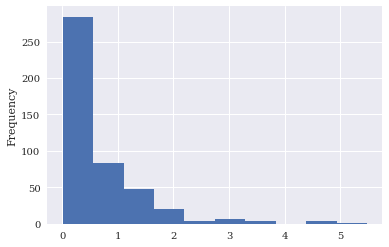

In [48]:
data['cr'].plot.hist()

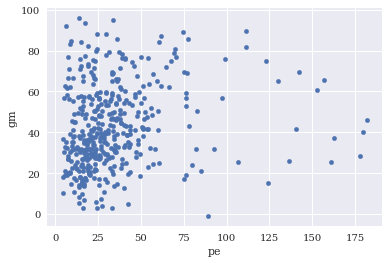

In [60]:
data2=data.loc[(data['pe'] < 200) & (data['gm'] < 10000)]
data2.plot.scatter(x='pe', y='gm')

In [ ]:
data2=data.dropna(subset=['mv'],axis=0)

In [ ]:
data2

,Symbol,Name,beta,roe,de,pe,ps,pfcf,mv,gm,...,cap_s,dy,cr,cur,naics,eps,growth_capitalexp,gics_ind,fs_sec,gics_sec
0,MMM,3M Company,0.89,42.42,121.74,17.56,2.94,17.77,101576.90,46.99,...,4.53,3.33,0.53,1.70,31,10.12,0.1,Capital Goods,Producer Manufacturing,Industrials
1,AOS,A. O. Smith Corporation,1.10,26.47,12.59,28.43,3.91,24.47,13534.47,37.07,...,2.12,1.23,0.56,1.57,31,3.02,0.0,Capital Goods,Producer Manufacturing,Industrials
2,ABT,Abbott Laboratories,0.75,20.53,53.77,35.75,5.85,29.11,248276.90,53.89,...,4.38,1.29,0.78,1.85,31,3.94,0.0,Health Care Equipment & Services,Health Technology,Health Care
3,ABBV,"AbbVie, Inc.",0.82,80.52,503.47,20.98,4.28,10.94,239432.90,69.49,...,1.40,3.92,0.28,0.79,31,6.45,1.4,Pharmaceuticals Biotechnology & Life Sciences,Health Technology,Health Care
4,ABMD,"ABIOMED, Inc.",1.46,9.64,NaN,111.15,14.73,NaN,15086.33,81.76,...,NaN,NaN,5.48,7.05,31,2.98,0.0,Health Care Equipment & Services,Health Technology,Health Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,YUM,"Yum! Brands, Inc.",1.25,NaN,NaN,26.63,6.37,28.41,40130.54,48.09,...,3.49,1.44,0.52,1.08,72,5.22,0.0,Consumer Services,Consumer Services,Consumer Discretionary
500,ZBRA,Zebra Technologies Corporation Class A,1.73,32.64,38.37,38.33,5.70,31.77,31792.77,44.68,...,1.05,0.00,0.19,0.94,31,15.53,0.0,Technology Hardware & Equipment,Electronic Technology,Information Technology
501,ZBH,"Zimmer Biomet Holdings, Inc.",1.13,3.23,58.12,66.55,3.41,26.07,26551.36,62.28,...,6.45,0.76,0.14,1.41,31,1.91,0.0,Health Care Equipment & Services,Health Technology,Health Care
502,ZION,"Zions Bancorporation, N.A.",1.25,14.55,28.63,9.30,3.42,19.61,9576.64,NaN,...,6.97,2.28,0.01,0.32,52,6.79,NaN,Banks,Finance,Financials


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 503
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             499 non-null    object 
 1   Name               499 non-null    object 
 2   beta               499 non-null    float64
 3   roe                474 non-null    float64
 4   de                 469 non-null    float64
 5   pe                 476 non-null    float64
 6   ps                 499 non-null    float64
 7   pfcf               454 non-null    float64
 8   mv                 499 non-null    float64
 9   gm                 447 non-null    float64
 10  gsales             499 non-null    float64
 11  altman             402 non-null    float64
 12  pvol               499 non-null    float64
 13  cap_s              498 non-null    float64
 14  dy                 497 non-null    float64
 15  cr                 449 non-null    float64
 16  cur                449 non

In [ ]:
data2.describe()

,beta,roe,de,pe,ps,pfcf,mv,gm,gsales,altman,pvol,cap_s,dy,cr,cur,naics,eps,growth_capitalexp
count,499.000000,474.000000,469.000000,476.000000,499.000000,454.000000,4.990000e+02,447.000000,499.000000,402.000000,499.000000,498.000000,497.000000,449.000000,449.000000,499.000000,499.000000,450.000000
mean,1.066092,55.780380,156.405714,36.689853,5.092465,40.172841,8.570345e+04,40.001790,25.513547,5.025746,9.571383,8.016365,1.534406,0.650490,1.612183,40.817635,8.381323,-0.010889
std,0.499602,368.240081,274.977253,48.280792,5.041844,100.845676,2.190224e+05,29.486308,101.378348,5.998500,3.817050,14.891767,1.438945,0.798887,1.114226,12.558170,19.061651,2.781380
min,-0.430000,-132.810000,0.340000,4.390000,0.100000,2.630000,6.376470e+03,-249.200000,-65.900000,-3.080000,4.080000,0.000000,0.000000,0.010000,0.050000,11.000000,-20.890000,-23.700000
25%,0.750000,10.430000,45.560000,15.607500,1.745000,13.702500,1.877855e+04,26.575000,6.365000,2.112500,7.205000,1.937500,0.240000,0.160000,0.930000,31.000000,2.585000,0.000000
50%,1.060000,18.445000,82.070000,24.845000,3.310000,23.945000,3.344233e+04,38.380000,14.350000,3.325000,8.640000,3.760000,1.270000,0.380000,1.330000,42.000000,4.940000,0.000000
75%,1.315000,31.650000,149.330000,39.127500,6.380000,36.805000,6.918584e+04,56.320000,24.380000,5.420000,10.645000,7.845000,2.400000,0.810000,1.940000,52.000000,8.555000,0.000000
max,4.710000,5863.580000,3494.650000,573.370000,27.790000,1473.550000,2.413423e+06,95.840000,2191.900000,55.750000,41.850000,189.050000,8.460000,5.480000,7.870000,72.000000,320.480000,35.600000


In [ ]:
data2['log_mv'] = np.log(data2['mv'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
formula = 'pe ~ beta + roe + de + altman + log_mv + gm + gsales + pvol	+ cap_s	+ dy	+ cr	+ cur'
results = smf.ols(formula, data2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     pe   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     6.776
Date:                Thu, 19 May 2022   Prob (F-statistic):           5.88e-11
Time:                        20:26:38   Log-Likelihood:                -1795.1
No. Observations:                 351   AIC:                             3616.
Df Residuals:                     338   BIC:                             3666.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.4419     28.073     -0.799      0.4

In [ ]:
data2.corr()

,beta,roe,de,pe,ps,pfcf,mv,gm,gsales,altman,pvol,cap_s,dy,cr,cur,naics,eps,growth_capitalexp
beta,1.000000,-0.079395,-0.092053,0.068494,0.063886,-0.002039,0.018675,-0.101625,0.159374,0.054296,0.775831,0.028896,-0.222000,0.076676,0.078979,0.039516,-0.012030,-0.080412
roe,-0.079395,1.000000,0.688829,-0.097493,0.087583,-0.053414,0.091196,0.147294,0.125849,0.097988,-0.064803,-0.130779,-0.019617,-0.015204,-0.047372,0.021315,0.090308,0.030906
de,-0.092053,0.688829,1.000000,-0.044639,-0.115563,0.095510,-0.048443,-0.058295,-0.060532,-0.174033,-0.070414,-0.041466,0.061359,-0.145291,-0.215181,0.135928,-0.036949,0.031790
pe,0.068494,-0.097493,-0.044639,1.000000,0.593247,0.327988,0.053075,0.215156,-0.029283,0.286280,0.082177,0.080169,-0.237169,0.177014,0.078290,0.103943,-0.094833,0.000932
ps,0.063886,0.087583,-0.115563,0.593247,1.000000,0.165828,0.214163,0.621423,0.017286,0.706467,0.051855,0.038678,-0.408821,0.480707,0.348642,0.096871,-0.014581,0.002545
pfcf,-0.002039,-0.053414,0.095510,0.327988,0.165828,1.000000,-0.002806,-0.087149,-0.000703,0.095019,0.064714,0.122443,-0.158816,0.104814,0.070986,0.020150,-0.040744,-0.023627
mv,0.018675,0.091196,-0.048443,0.053075,0.214163,-0.002806,1.000000,0.161233,0.012807,0.172525,-0.063880,0.101586,-0.061784,0.166952,0.047235,0.074423,0.222852,0.015418
gm,-0.101625,0.147294,-0.058295,0.215156,0.621423,-0.087149,0.161233,1.000000,0.096531,0.357395,-0.047744,0.017925,-0.300490,0.383953,0.245208,0.091483,-0.001708,0.011326
gsales,0.159374,0.125849,-0.060532,-0.029283,0.017286,-0.000703,0.012807,0.096531,1.000000,0.047899,0.432890,0.004500,-0.044612,0.060785,0.018272,0.029131,0.059474,-0.021103
altman,0.054296,0.097988,-0.174033,0.286280,0.706467,0.095019,0.172525,0.357395,0.047899,1.000000,0.036324,-0.034857,-0.341119,0.552764,0.541831,-0.007095,0.094992,-0.036804
